##### Task 2: Change Point Modeling and Insight Generation

In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from data_loader import DataLoader
from event_manager import EventManager
from change_point_model import EnhancedChangePointModel

%matplotlib inline

In [2]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np

from data_loader import DataLoader

##### 1. Data Preparation

In [3]:
# Load data
loader = DataLoader('../data/BrentOilPrices.csv')
df = loader.load_data()

# Use log returns for analysis
log_returns = df['Log_Returns'].dropna()
dates = df.loc[log_returns.index, 'Date']

print(f"Data: {len(log_returns)} observations")
print(f"Period: {dates.min()} to {dates.max()}")

Data: 9010 observations
Period: 1987-05-21 00:00:00 to 2022-11-14 00:00:00


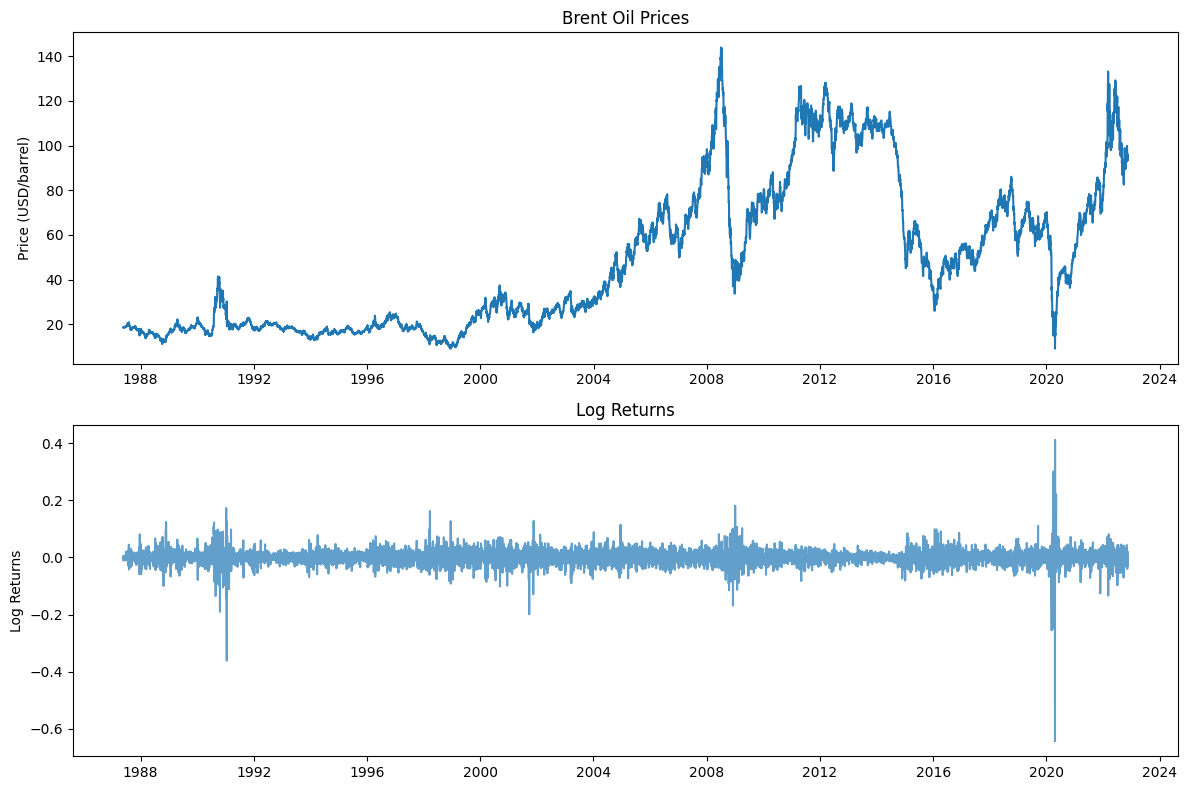

In [4]:
# Visualize data
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

axes[0].plot(df['Date'], df['Price'])
axes[0].set_title('Brent Oil Prices')
axes[0].set_ylabel('Price (USD/barrel)')

axes[1].plot(dates, log_returns, alpha=0.7)
axes[1].set_title('Log Returns')
axes[1].set_ylabel('Log Returns')

plt.tight_layout()
plt.show()

##### 2. Bayesian Change Point Model

In [6]:
from change_point_model import EnhancedChangePointModel
# Fit change point model
print("Fitting Bayesian Change Point Model...")
model = EnhancedChangePointModel(log_returns, dates)
trace = model.fit(n_samples=1000, tune=500, chains=2)
print("Model fitting completed!")

Fitting Bayesian Change Point Model...


NameError: name 'pm' is not defined

##### 3. Change Point Identification

In [ ]:
# Get change point results
cp_summary = model.get_change_point_summary()

print("Change Point Results:")
print(f"Most likely change point: Index {cp_summary['mode_tau']}")
if 'mode_date' in cp_summary:
    print(f"Change point date: {cp_summary['mode_date']}")
print(f"95% HDI: {cp_summary['tau_95_hdi']}")

AttributeError: 'NoneType' object has no attribute 'posterior'

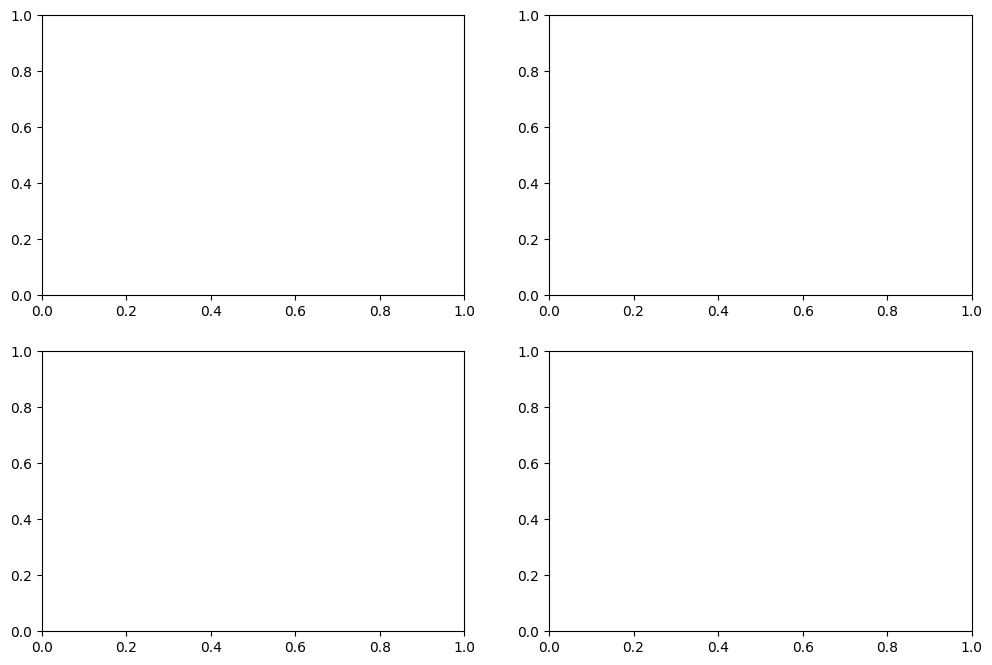

In [9]:
# Visualize results
model.plot_results(figsize=(12, 8))

##### 4. Parameter Analysis

In [10]:
# Parameter summary
param_summary = model.get_parameter_summary()
print("Parameter Summary:")
print(param_summary)

# Extract key changes
mu1 = param_summary.loc['mu1', 'mean']
mu2 = param_summary.loc['mu2', 'mean']
sigma1 = param_summary.loc['sigma1', 'mean']
sigma2 = param_summary.loc['sigma2', 'mean']

print(f"\nMean change: {mu2 - mu1:.6f}")
print(f"Volatility change: {((sigma2**2 - sigma1**2) / sigma1**2 * 100):.2f}%")

NameError: name 'az' is not defined

##### 5. Event Association

In [11]:
# Find nearby events
event_manager = EventManager()

if 'mode_date' in cp_summary:
    change_date = cp_summary['mode_date']
    nearby_events = event_manager.find_nearest_event(change_date, days_threshold=60)
    
    print(f"Events near change point ({change_date}):")
    for _, event in nearby_events.head(3).iterrows():
        print(f"- {event['date']}: {event['event']} ({event['category']}, {event['impact']})")
        print(f"  Days from change point: {event['days_diff']}")

NameError: name 'cp_summary' is not defined

##### 6. Impact Quantification

In [12]:
# Quantify economic impact
tau_mode = int(cp_summary['mode_tau'])

# Price impact
price_before = df['Price'].iloc[max(0, tau_mode-10):tau_mode].mean()
price_after = df['Price'].iloc[tau_mode:min(len(df), tau_mode+10)].mean()
price_change = (price_after - price_before) / price_before * 100

print(f"Economic Impact:")
print(f"Price before: ${price_before:.2f}/barrel")
print(f"Price after: ${price_after:.2f}/barrel")
print(f"Price change: {price_change:.2f}%")

# Volatility impact
vol_before = log_returns.iloc[:tau_mode].std() * np.sqrt(252)
vol_after = log_returns.iloc[tau_mode:].std() * np.sqrt(252)
vol_change = (vol_after - vol_before) / vol_before * 100

print(f"\nVolatility Impact:")
print(f"Volatility before: {vol_before:.2f}%")
print(f"Volatility after: {vol_after:.2f}%")
print(f"Volatility change: {vol_change:.2f}%")

NameError: name 'cp_summary' is not defined

##### 7. Model Diagnostics

In [13]:
# Check convergence
convergence = model.check_convergence()
print(f"Model converged: {convergence['converged']}")

# Plot diagnostics
az.plot_trace(model.trace, var_names=['tau', 'mu1', 'mu2'])
plt.tight_layout()
plt.show()

NameError: name 'az' is not defined